# L2: Multimodal Search

This project demonstrates the use of **Weaviate**, an AI-driven vector search engine, for managing and querying multimodal data (**images and videos**). It integrates advanced embedding techniques, **UMAP** visualization for dimensionality reduction, and interactive plotting.

## Key Steps and Accomplishments

### **1. Setting Up Weaviate**
- Initialized and connected to a local embedded instance of Weaviate.
- Configured modules for:
  - **Filesystem backups**.
  - **Multi-modal embedding (`multi2vec-palm`)** for images and videos.

### **2. Ingesting Data**
#### **Images**:
- Scanned a directory for image files.
- Converted image files to **Base64** format for embedding generation.
- Batched uploads to a collection named **`Animals`** with metadata (`name`, `path`, `mediaType`).

#### **Videos**:
- Scanned a directory for video files.
- Converted video files to **Base64** and uploaded them to the same collection (`Animals`).
- Added metadata like `mediaType` to distinguish between images and videos.

### **3. Multimodal Search Capabilities**
#### **Text-to-Media Search**:
- Enabled **semantic search** using a natural language query (e.g., "dog playing with stick").
- Retrieved and displayed matching images or videos from the collection.

#### **Image-to-Media Search**:
- Used a given image as a query to find semantically similar media in the database.

#### **Video-to-Media Search**:
- Used a video file to retrieve similar videos from the collection.

### **4. Dimensionality Reduction and Visualization**
- Fetched embeddings from the Weaviate collection.
- Used **UMAP (Uniform Manifold Approximation and Projection)** to reduce high-dimensional embeddings into 2D space.
- Visualized the embeddings with color-coded labels (`image` vs `video`) for better interpretability.

## Key Features Demonstrated
- **Multimodal Data Handling**:
  - Unified management of images and videos in a single vectorized collection.
- **Semantic Search**:
  - Search using text, images, or videos as input queries.
- **Visualization**:
  - Used UMAP to explore embedding clusters for images and videos.
    

* In this classroom, the libraries have been already installed for you.
* If you would like to run this code on your own machine, you need to install the following:
```
    !pip install -U weaviate-client
```

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Setup
### Load environment variables and API keys

In [2]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
EMBEDDING_API_KEY = os.getenv("EMBEDDING_API_KEY")

## Connect to Weaviate

Weaviate is an **open-source vector search engine** designed for AI-driven semantic search and data retrieval. It combines structured and unstructured data storage with advanced vector-based querying.

### Key Features
- **Vector Search**: Efficient Approximate Nearest Neighbor (ANN) search for semantic similarity.
- **Embedding Integration**: Built-in support for models like OpenAI, Hugging Face, Cohere, and more.
- **GraphQL Queries**: Combines traditional structured queries with semantic search.
- **Multi-modal Data**: Handles text, images, audio, and video.
- **Extensibility**: Supports modules for backups, classification, and custom embeddings.
- **Knowledge Graph**: Stores structured entity relationships for enhanced data exploration.

### Use Cases
- Semantic search engines.
- Recommendation systems.
- Image and text retrieval.
- Knowledge graph and reasoning.
- AI-driven classification and tagging.

Weaviate is ideal for modern applications requiring semantic understanding and fast similarity search.


In [3]:
import weaviate, os

client = weaviate.connect_to_embedded(
    version="1.24.21",
    environment_variables={
        "ENABLE_MODULES": "backup-filesystem,multi2vec-palm",
        "BACKUP_FILESYSTEM_PATH": "/home/jovyan/work/L2/backups",
    },
    headers={
        "X-PALM-Api-Key": EMBEDDING_API_KEY,
    }
)

client.is_ready()

Started /home/jovyan/.cache/weaviate-embedded: process ID 169


{"action":"startup","default_vectorizer_module":"none","level":"info","msg":"the default vectorizer modules is set to \"none\", as a result all new schema classes without an explicit vectorizer setting, will use this vectorizer","time":"2024-11-19T12:10:57Z"}
{"action":"startup","auto_schema_enabled":true,"level":"info","msg":"auto schema enabled setting is set to \"true\"","time":"2024-11-19T12:10:57Z"}
{"level":"info","msg":"No resource limits set, weaviate will use all available memory and CPU. To limit resources, set LIMIT_RESOURCES=true","time":"2024-11-19T12:10:57Z"}
{"action":"grpc_startup","level":"info","msg":"grpc server listening at [::]:50050","time":"2024-11-19T12:10:57Z"}
{"action":"restapi_management","level":"info","msg":"Serving weaviate at http://127.0.0.1:8079","time":"2024-11-19T12:10:57Z"}
/usr/local/lib/python3.11/site-packages/weaviate/warnings.py:130: DeprecationWarning: Dep005: You are using weaviate-client version 4.5.4. The latest version is 4.9.3.
          

True

## Create the Collection

This code interacts with Weaviate to create a collection named `Animals`, configured to use Google's **multi2vec-palm** vectorizer with specific settings.

This project is designed to manage multimodal data within the Google Cloud project `semi-random-dev`, utilizing region `us-central1` for processing and the PaLM-based `multi2vec-palm` model for embedding generation.

### Key Functionality
1. **Google Cloud Project**:
   - Associates the vectorization process with the Google Cloud project `semi-random-dev`.

2. **Location**:
   - Specifies the processing region as `us-central1` (Google Cloud's Central US data center).

3. **Vectorizer Configuration**:
   - Uses the `multi2vec-palm` vectorizer for multimodal data (images and videos).
   - **Model**: Utilizes the `multimodalembedding@001` model for embedding generation.
   - **Dimensions**: Embedding vectors have a dimensionality of `1408`.
   - **Fields**:
     - `image`: Specifies the field for storing image data.
     - `video`: Specifies the field for storing video data.

4. **Collection Creation**:
   - Deletes any existing `Animals` collection to ensure a fresh configuration.
   - Creates a new `Animals` collection with the above settings.


In [4]:
from weaviate.classes.config import Configure

# The code checks if it already exists, If it exists, it deletes the collection to ensure a fresh configuration.
if(client.collections.exists("Animals")):
    client.collections.delete("Animals")

client.collections.create(
    # Defines the collection name.
    name="Animals",
    # uses the multi2vec-palm vectorizer, which can process multimodal data (e.g., images and videos).
    vectorizer_config=Configure.Vectorizer.multi2vec_palm(
        image_fields=["image"],
        video_fields=["video"],
        project_id="semi-random-dev",
        location="us-central1",
        model_id="multimodalembedding@001",
        dimensions=1408,        
    )
)


{"level":"warning","msg":"prop len tracker file /home/jovyan/.local/share/weaviate/animals/vUKJ037Op9wC/proplengths does not exist, creating new tracker","time":"2024-11-19T12:10:57Z"}
{"action":"hnsw_prefill_cache_async","level":"info","msg":"not waiting for vector cache prefill, running in background","time":"2024-11-19T12:10:57Z","wait_for_cache_prefill":false}
{"level":"info","msg":"Created shard animals_vUKJ037Op9wC in 4.663342ms","time":"2024-11-19T12:10:57Z"}
{"action":"hnsw_vector_cache_prefill","count":1000,"index_id":"main","level":"info","limit":1000000000000,"msg":"prefilled vector cache","time":"2024-11-19T12:10:57Z","took":56477}


## Helper functions

In [5]:
import base64

# Helper function to convert a file to base64 representation
def toBase64(path):
    with open(path, 'rb') as file:
        return base64.b64encode(file.read()).decode('utf-8')


## Insert Images into Weaviate
- Scans a directory for image files (./source/animal_image/).
- Encodes each image into Base64 format.
- Batches the upload of images to the Animals collection in Weaviate.
- Associates metadata (file name, path, media type) with each uploaded image.


In [6]:
animals = client.collections.get("Animals")

source = os.listdir("./source/animal_image/")
# Limits requests to 100 per minute to avoid overwhelming the server or hitting API rate limits.
with animals.batch.rate_limit(requests_per_minute=100) as batch:
    for name in source:
        print(f"Adding {name}")

        path = "./source/image/" + name

        batch.add_object({
            "name": name,            # name of the file
            "path": path,            # path to the file to display result
            "image": toBase64(path), # this gets vectorized - "image" was configured in vectorizer_config as the property holding images
            "mediaType": "image",    # a label telling us how to display the resource 
        })


Adding cat1.jpg
Adding dog3.jpg
Adding dog1.jpg
Adding cat3.jpg
Adding meerkat2.jpg
Adding cat2.jpg
Adding meerkat1.jpg
Adding dog2.jpg
Adding meerkat3.jpg


{"action":"telemetry_push","level":"info","msg":"telemetry started","payload":"\u0026{MachineID:47efe6f1-ebe7-46ef-bb4b-df753422bad6 Type:INIT Version:1.24.21 NumObjects:0 OS:linux Arch:amd64 UsedModules:[]}","time":"2024-11-19T12:10:58Z"}


In [7]:
# Check for failed objects
if len(animals.batch.failed_objects) > 0:
    print(f"Failed to import {len(animals.batch.failed_objects)} objects")
    for failed in animals.batch.failed_objects:
        print(f"e.g. Failed to import object with error: {failed.message}")
else:
    print("No errors")

No errors


## Insert Video Files into Weaviate
> Note: the input video must be at least 4 seconds long.

In [8]:
animals = client.collections.get("Animals")

source = os.listdir("./source/video/")

for name in source:
    print(f"Adding {name}")
    path = "./source/video/" + name    

    # insert videos one by one
    animals.data.insert({
        "name": name,
        "path": path,
        "video": toBase64(path),
        "mediaType": "video"
    })

Adding meerkat-watch.mp4
Adding cat-play.mp4
Adding meerkat-dig.mp4
Adding dog-high-five.mp4
Adding dog-with-stick.mp4
Adding cat-clean.mp4


In [9]:
# Check for failed objects
if len(animals.batch.failed_objects) > 0:
    print(f"Failed to import {len(animals.batch.failed_objects)} objects")
    for failed in animals.batch.failed_objects:
        print(f"e.g. Failed to import object with error: {failed.message}")
else:
    print("No errors")

No errors


## Check count
> Total count should be 15 (9x image + 6x video)

In [10]:
agg = animals.aggregate.over_all(
    group_by="mediaType"
)

for group in agg.groups:
    print(group)

AggregateGroup(grouped_by=GroupedBy(prop='mediaType', value='image'), properties={}, total_count=9)
AggregateGroup(grouped_by=GroupedBy(prop='mediaType', value='video'), properties={}, total_count=6)


<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Access Utils File and Helper Functions:</b> To access the files for this notebook, 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>

## Build MultiModal Search
### Helper Functions
- `Media files` (images or videos) are processed or displayed.
- Data is encoded into `Base64` for storage, transmission, or integration with APIs.



In [11]:
# Helper functions to display results
import json
from IPython.display import Image, Video

# Pretty-prints JSON data with indentation for better readability.
def json_print(data):
    print(json.dumps(data, indent=2))

# Displays media (image or video) from a given file path.
def display_media(item):
    path = item["path"]

    if(item["mediaType"] == "image"):
        display(Image(path, width=300))

    elif(item["mediaType"] == "video"):
        display(Video(path, width=300))


In [12]:
import base64, requests

# Helper function – get base64 representation from an online image
def url_to_base64(url):
    image_response = requests.get(url)
    content = image_response.content
    return base64.b64encode(content).decode('utf-8')

# Helper function - get base64 representation from a local file
def file_to_base64(path):
    with open(path, 'rb') as file:
        return base64.b64encode(file.read()).decode('utf-8')

## Text to Media Search

> Where the fun begins!

In [13]:
# Retrieves the Animals collection from the Weaviate instance to prepare for querying.
animals = client.collections.get("Animals")

response = animals.query.near_text(
    query="dog playing with stick",
    # Specifies which properties of the matching objects to return
    return_properties=['name','path','mediaType'],
    limit=4
)

{
  "mediaType": "video",
  "path": "./source/video/dog-with-stick.mp4",
  "name": "dog-with-stick.mp4"
}


{
  "mediaType": "image",
  "path": "./source/image/dog3.jpg",
  "name": "dog3.jpg"
}


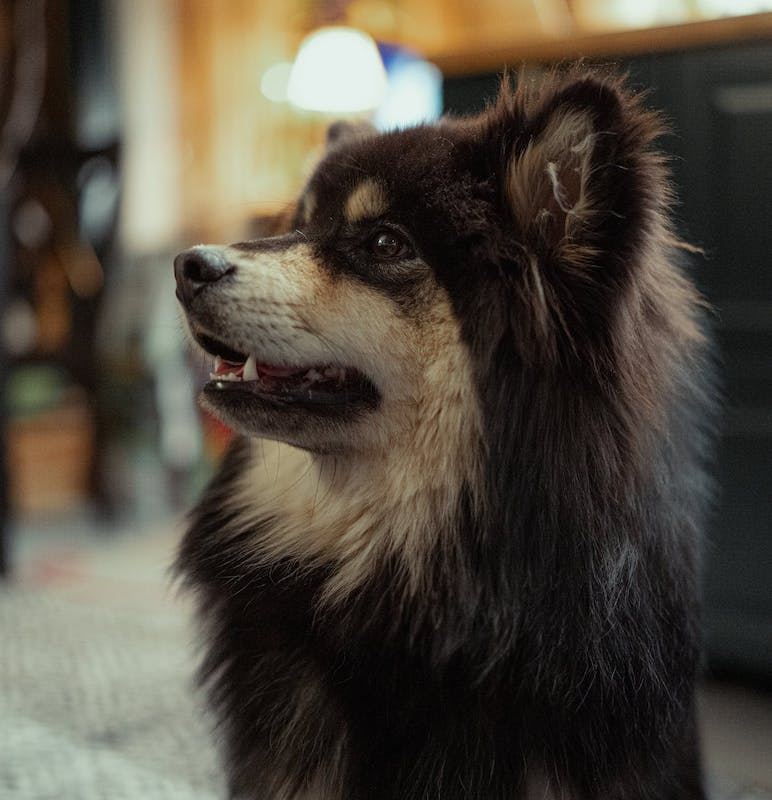

{
  "mediaType": "video",
  "path": "./source/video/dog-high-five.mp4",
  "name": "dog-high-five.mp4"
}


{
  "mediaType": "image",
  "path": "./source/image/dog1.jpg",
  "name": "dog1.jpg"
}


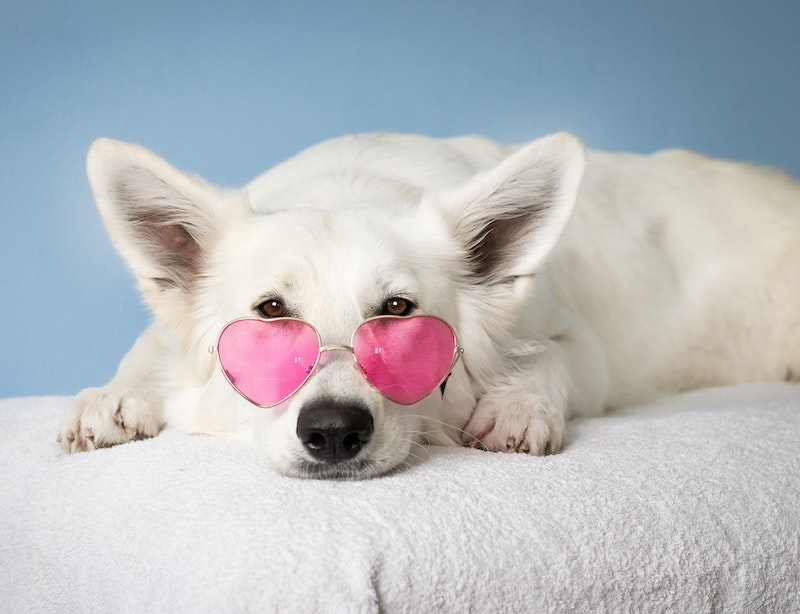

In [14]:
for obj in response.objects:
    json_print(obj.properties)
    display_media(obj.properties)

> Note: Please be aware that the output from the previous cell may differ from what is shown in the video. This variation is normal and should not cause concern.

## Image to Media Search

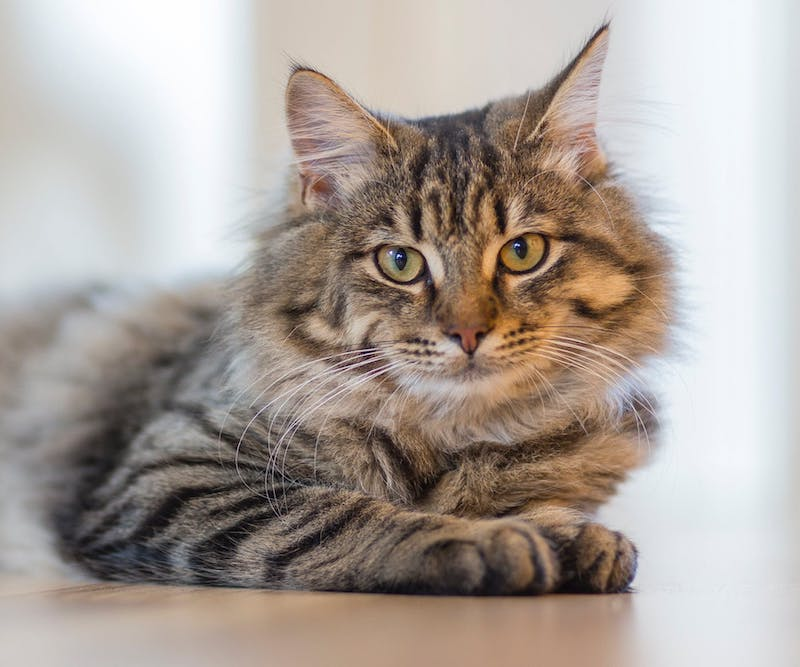

In [15]:
# Use this image as an input for the query
Image("./test/test-cat.jpg", width=300)

{
  "mediaType": "image",
  "path": "./source/image/cat2.jpg",
  "name": "cat2.jpg"
}


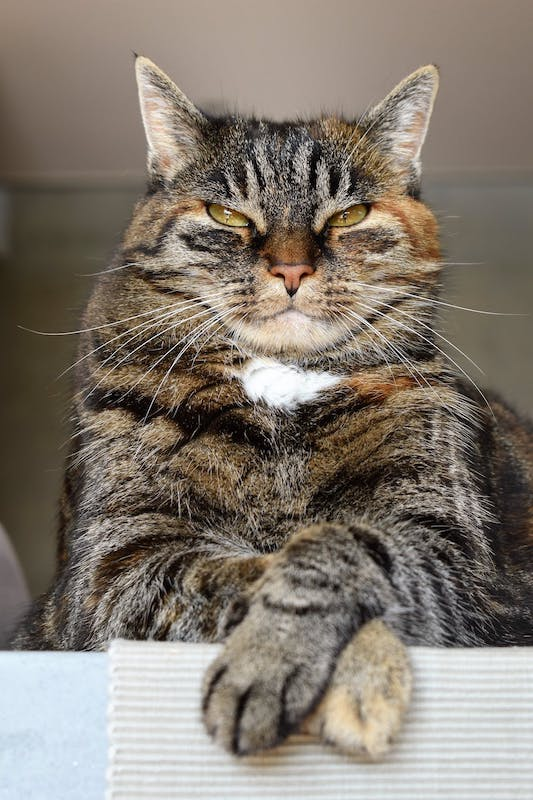

{
  "mediaType": "image",
  "path": "./source/image/cat1.jpg",
  "name": "cat1.jpg"
}


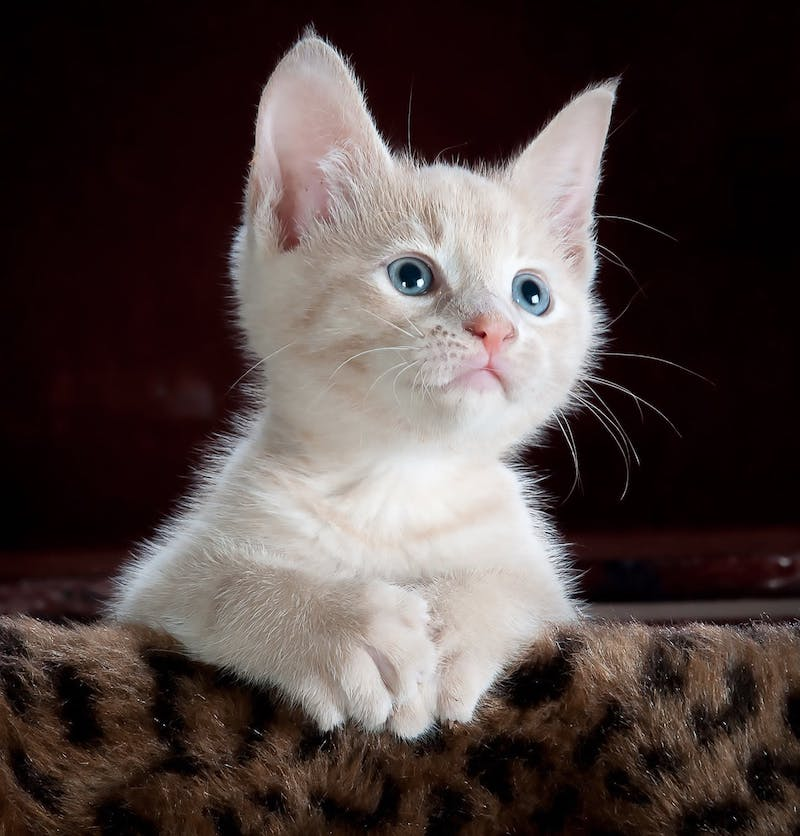

{
  "mediaType": "image",
  "path": "./source/image/cat3.jpg",
  "name": "cat3.jpg"
}


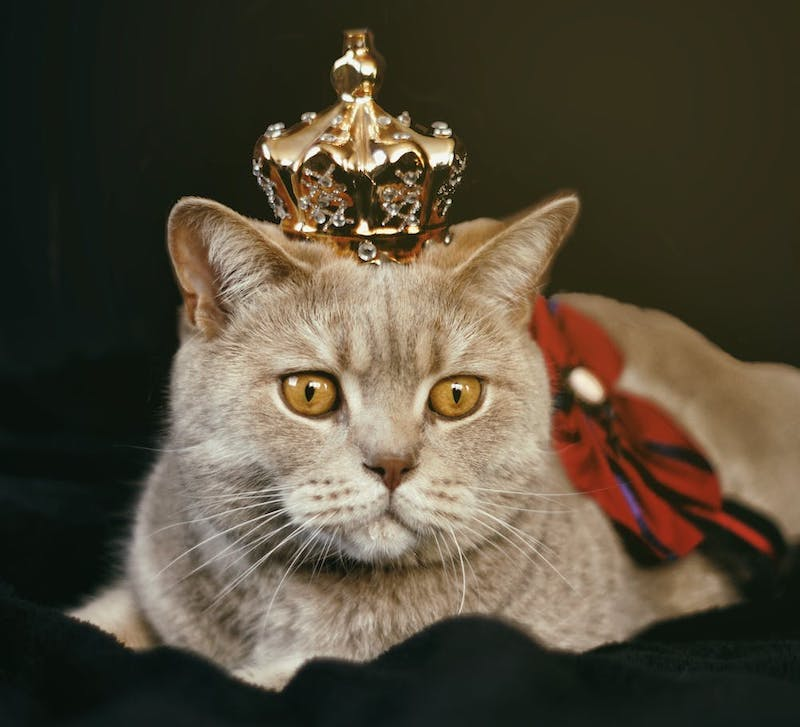

In [16]:
# The query
response = animals.query.near_image(
    near_image=file_to_base64("./test/test-cat.jpg"),
    return_properties=['name','path','mediaType'],
    limit=3
)

for obj in response.objects:
    json_print(obj.properties)
    display_media(obj.properties)

## Image search - from web URL

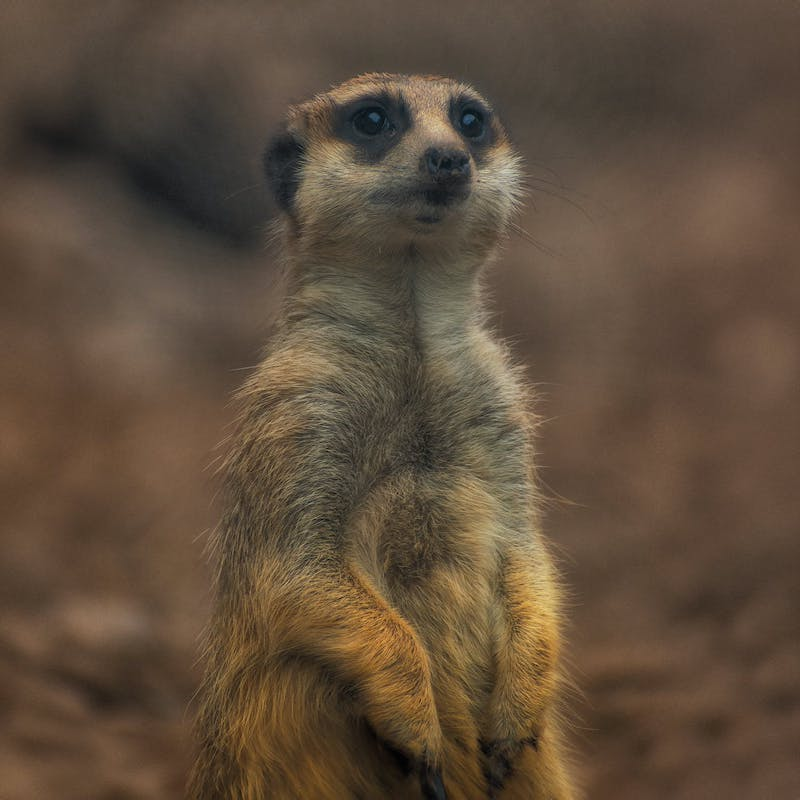

In [17]:
Image("https://raw.githubusercontent.com/weaviate-tutorials/multimodal-workshop/main/2-multimodal/test/test-meerkat.jpg", width=300)

{
  "mediaType": "image",
  "path": "./source/image/meerkat1.jpg",
  "name": "meerkat1.jpg"
}


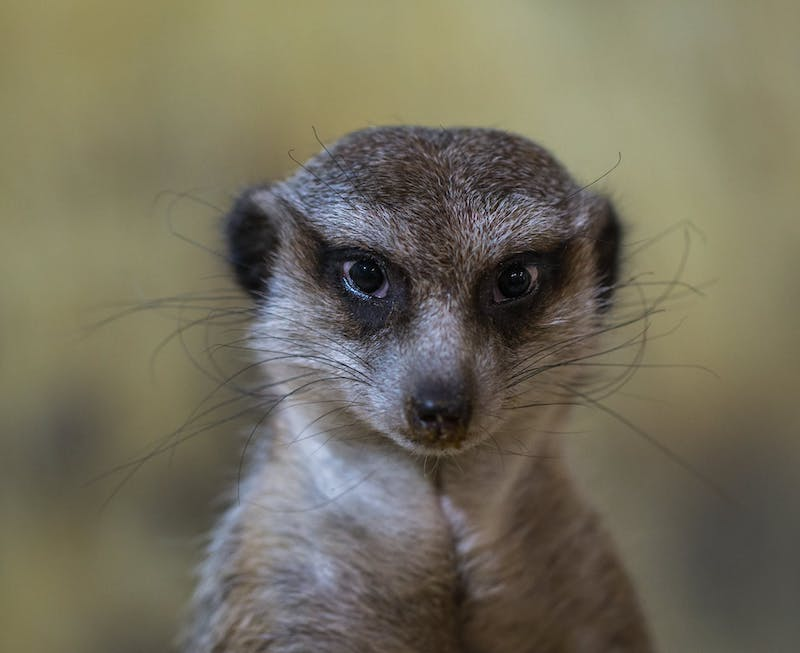

{
  "mediaType": "image",
  "path": "./source/image/meerkat3.jpg",
  "name": "meerkat3.jpg"
}


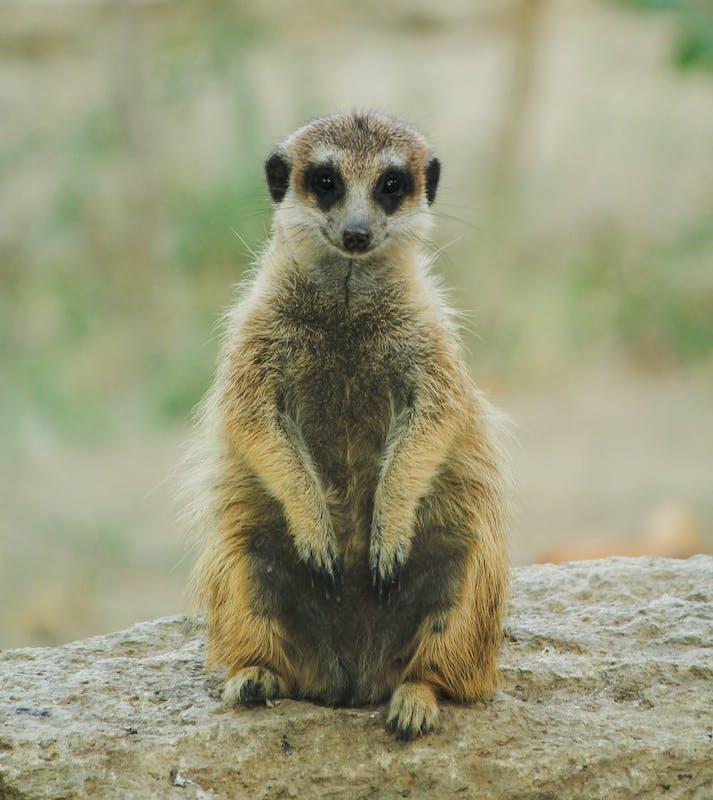

{
  "mediaType": "video",
  "path": "./source/video/meerkat-watch.mp4",
  "name": "meerkat-watch.mp4"
}


In [18]:
# The query
response = animals.query.near_image(
    near_image=url_to_base64("https://raw.githubusercontent.com/weaviate-tutorials/multimodal-workshop/main/2-multimodal/test/test-meerkat.jpg"),
    return_properties=['name','path','mediaType'],
    limit=3
)

for obj in response.objects:
    json_print(obj.properties)
    display_media(obj.properties)

## Video to Media Search
> Note: the input video must be at least 4 seconds long.

In [19]:
Video("./test/test-meerkat.mp4", width=400)

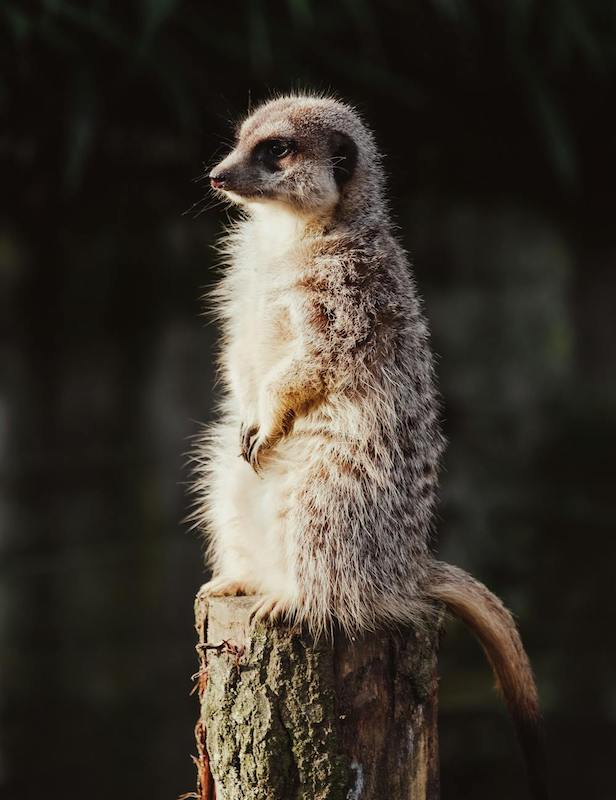

In [20]:
from weaviate.classes.query import NearMediaType

response = animals.query.near_media(
    media=file_to_base64("./test/test-meerkat.mp4"),
    media_type=NearMediaType.VIDEO,
    return_properties=['name','path','mediaType'],
    limit=3
)

for obj in response.objects:
    # json_print(obj.properties)
    display_media(obj.properties)

## Visualizing a Multimodal Vector Space

> To make this more exciting, let's loadup a large dataset!

- `UMAP (Uniform Manifold Approximation and Projection)`: A powerful technique for dimensionality reduction.



In [21]:
import numpy as np
import sklearn.datasets
import pandas as pd
import umap
import umap.plot
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(
/usr/local/lib/python3.11/site-packages/numba/core/decorators.py:161: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is True and supplying this argument has no effect.
  warnings.warn(msg, NumbaDeprecationWarning)


## Load vector embeddings and mediaType from Weaviate 

In [22]:
client.backup.restore(
    backup_id="resources-img-and-vid",
    include_collections="Resources",
    backend="filesystem"
)

# It can take a few seconds for the "Resources" collection to be ready.
# We add 5 seconds of sleep to make sure it is ready for the next cells to use.
import time
time.sleep(5)

{"action":"try_restore","backend":"filesystem","backup_id":"resources-img-and-vid","level":"info","msg":"","time":"2024-11-19T12:12:51Z","took":2528334}
{"action":"hnsw_prefill_cache_async","level":"info","msg":"not waiting for vector cache prefill, running in background","time":"2024-11-19T12:12:52Z","wait_for_cache_prefill":false}
{"level":"info","msg":"Completed loading shard resources_YR4XdMe3ODX3 in 4.69004ms","time":"2024-11-19T12:12:52Z"}
{"action":"restore","backup_id":"resources-img-and-vid","class":"Resources","level":"info","msg":"successfully restored","time":"2024-11-19T12:12:52Z"}
{"action":"restore","backup_id":"resources-img-and-vid","level":"info","msg":"backup restored successfully","time":"2024-11-19T12:12:52Z"}
{"action":"hnsw_vector_cache_prefill","count":16062,"index_id":"main","level":"info","limit":1000000000000,"msg":"prefilled vector cache","time":"2024-11-19T12:12:52Z","took":174986105}
{"action":"restore","backup_id":"resources-img-and-vid","level":"info","m

In [23]:
# Collection named "Resources"
collection = client.collections.get("Resources")
print(len(collection))
# Stores the embedding vectors of the items.
embs = []
# Stores the mediaType labels
labs = []
for item in collection.iterator(include_vector=True):
#     print(item.properties)
    labs.append(item.properties['mediaType'])
    embs.append(item.vector)


13594


In [24]:
embs2 = [emb['default'] for emb in embs]
# Convert Embeddings to DataFrame
emb_df = pd.DataFrame(embs2)
# Convert Labels to Pandas Series
labels = pd.Series(labs)

# Encode Labels
labels[labels=='image'] = 0
labels[labels=='video'] = 1

>Note: this might take some minutes to complete the execution.

In [25]:
%%time
# mapper2: A UMAP model fitted to the embedding data.
mapper2 = umap.UMAP().fit(emb_df)

CPU times: user 54.2 s, sys: 1.26 s, total: 55.5 s
Wall time: 21.6 s


## Plot the embeddings

<Figure size 1000x800 with 0 Axes>

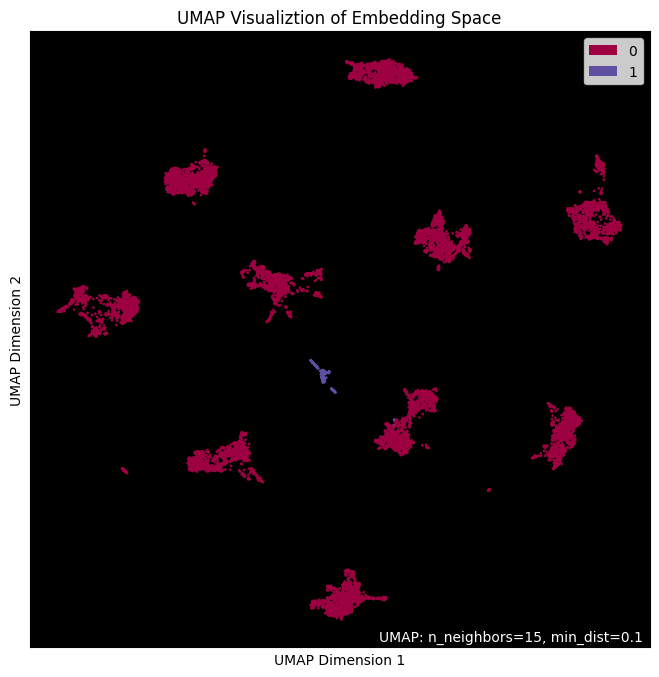

In [33]:
plt.figure(figsize=(10, 8))
umap.plot.points(mapper2, labels=labels, theme='inferno')

# Show plot
plt.title('UMAP Visualiztion of Embedding Space')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show();

<Figure size 1000x800 with 0 Axes>

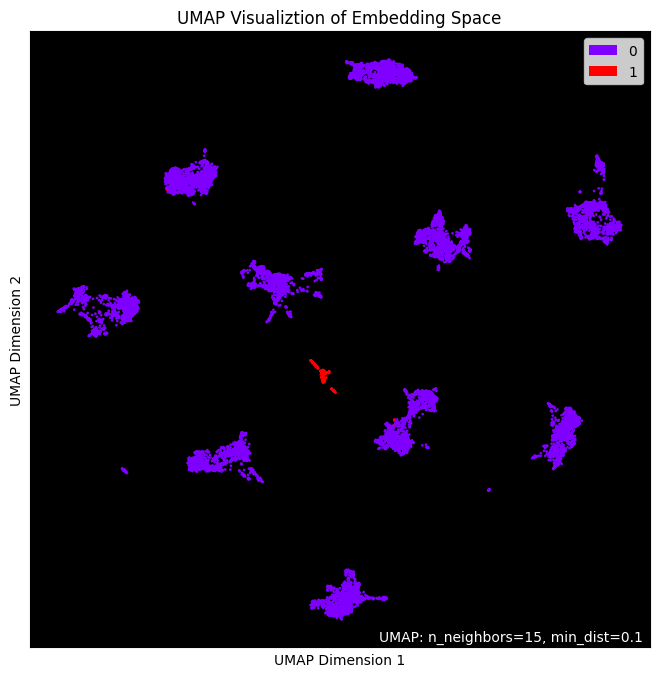

In [34]:
plt.figure(figsize=(10, 8))
umap.plot.points(mapper2, labels=labels, theme='fire')

# Show plot
plt.title('UMAP Visualiztion of Embedding Space')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show();

## Interactive plot of vectors

>Note: Once you run the following cell, please be aware that on the right-hand side,  there are special buttons available. These buttons enable you to perform various functions such as highlighting and more.

In [35]:
umap.plot.output_notebook()

p = umap.plot.interactive(mapper2, labels=labels, theme='fire')

umap.plot.show(p)

Loading BokehJS ...

## Close the connection to Weaviate

In [ ]:
client.close()

### Try it yourself! 

Run any of the cells above with your own images or URL for images or videos!